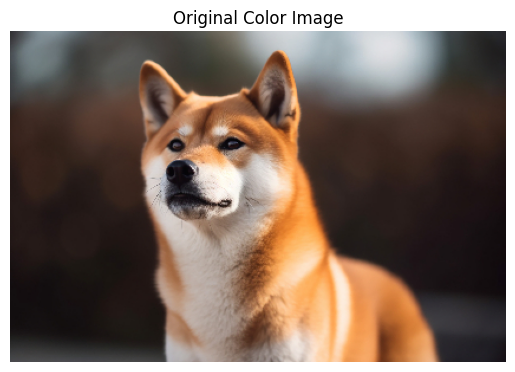

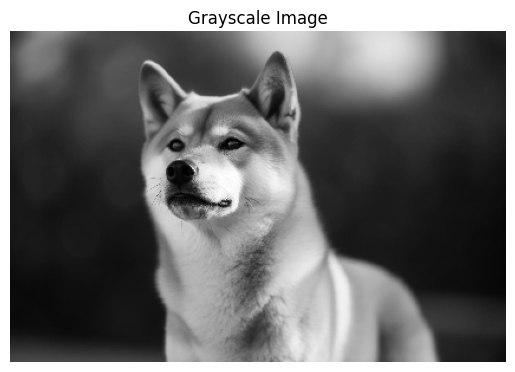

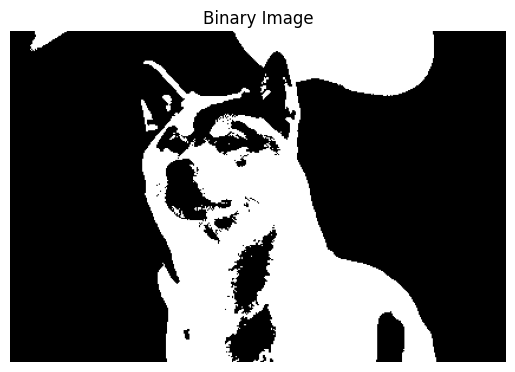

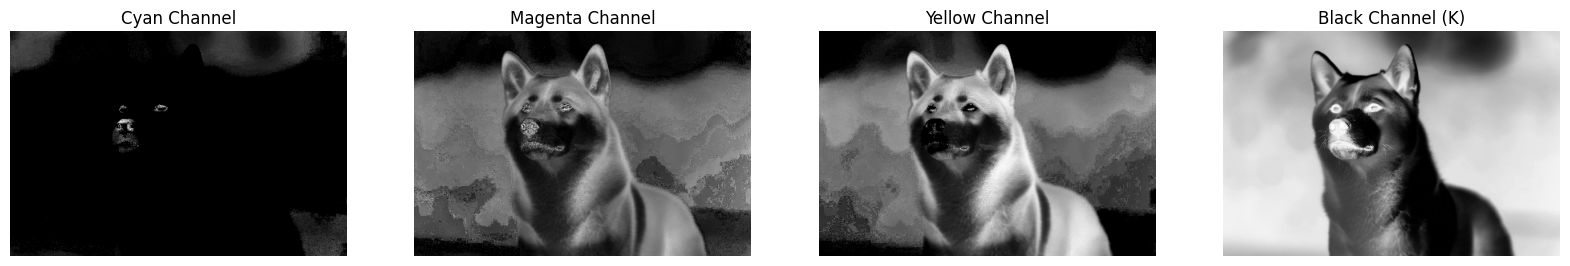

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
image = cv2.imread('dog.jpg')

# Convert the image from BGR (OpenCV default) to RGB (for Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original color image
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')
plt.show()

# Convert the color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Convert to Binary Image using a threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

# Convert RGB to CMYK
def rgb_to_cmyk(image_rgb):
    # Normalize the RGB values to the range [0, 1]
    img_float = image_rgb.astype(float) / 255.0
    # Calculate the K channel
    K = 1 - np.max(img_float, axis=2)
    # Prevent division by zero
    K[K == 1] = 0.999999
    # Calculate the C, M, and Y channels
    C = (1 - img_float[..., 0] - K) / (1 - K)
    M = (1 - img_float[..., 1] - K) / (1 - K)
    Y = (1 - img_float[..., 2] - K) / (1 - K)
    # Combine the channels into a CMYK image
    CMYK = np.stack((C, M, Y, K), axis=-1)
    # Scale to [0, 255] and convert to uint8
    CMYK = (CMYK * 255).astype(np.uint8)
    return CMYK
# Convert the RGB image to CMYK
cmyk_image = rgb_to_cmyk(image_rgb)
# Display the CMYK image (showing each channel separately)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(cmyk_image[..., 0], cmap='gray')
axs[0].set_title('Cyan Channel')
axs[0].axis('off')
axs[1].imshow(cmyk_image[..., 1], cmap='gray')
axs[1].set_title('Magenta Channel')
axs[1].axis('off')
axs[2].imshow(cmyk_image[..., 2], cmap='gray')
axs[2].set_title('Yellow Channel')
axs[2].axis('off')
axs[3].imshow(cmyk_image[..., 3], cmap='gray')
axs[3].set_title('Black Channel (K)')
axs[3].axis('off')

plt.show()
